Customers Summary:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00

Products Summary:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4

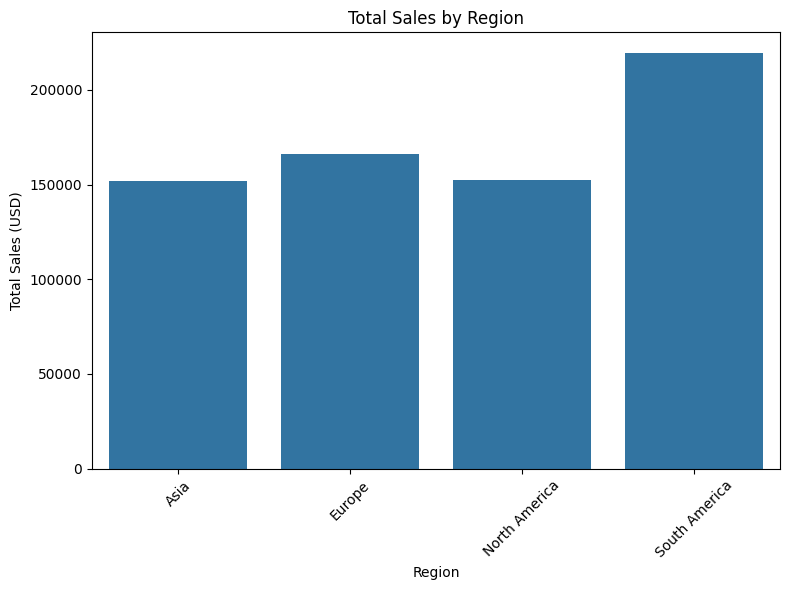


Top 5 Categories by Total Sales:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


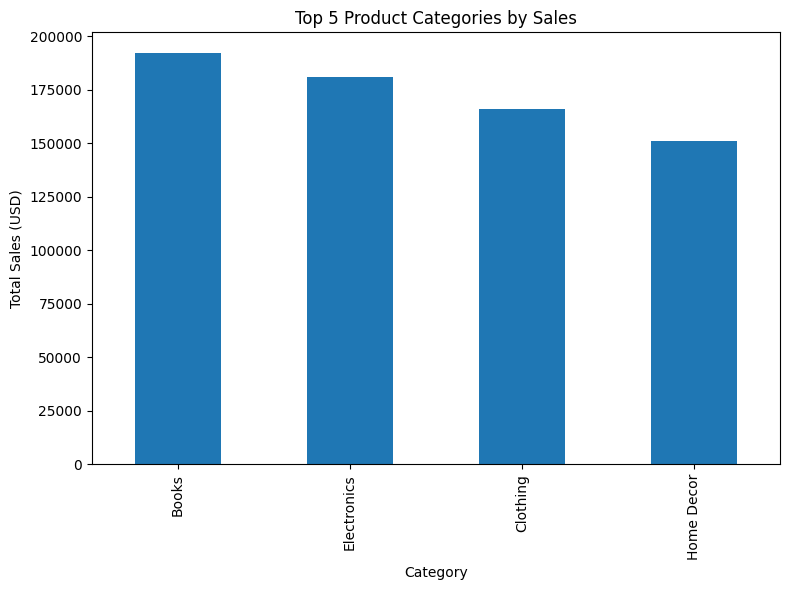


Signup Trends Over Time:
SignupYearMonth
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: count, dtype: int64


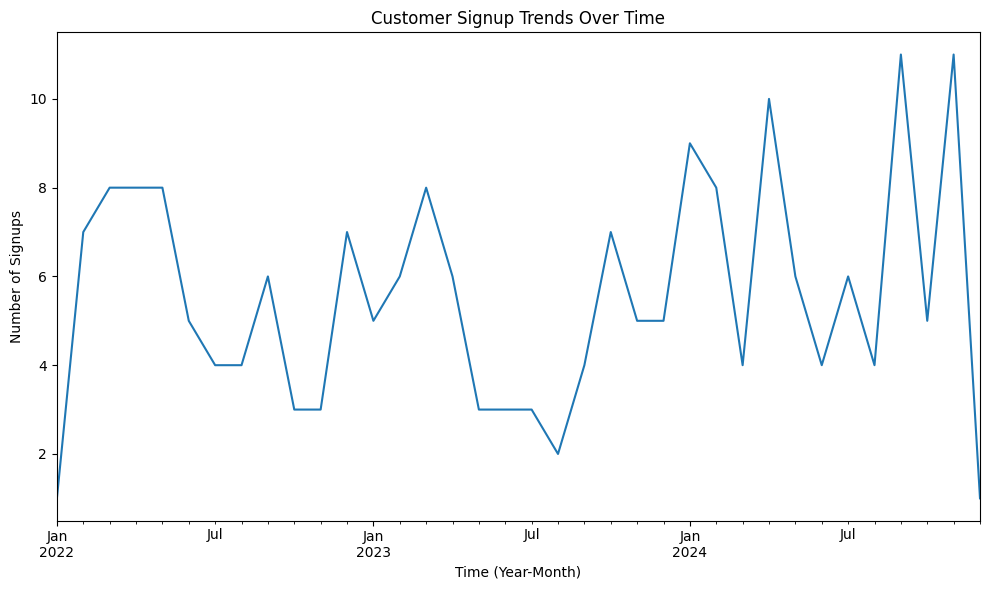


Customer Transaction Frequency Summary:
count    199.000000
mean       5.025126
std        2.198340
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       11.000000
Name: TransactionID, dtype: float64

Regional Product Preferences:
Category          Books  Clothing  Electronics  Home Decor
Region                                                    
Asia           33119.03  49353.09     35658.15    33944.70
Europe         47464.42  36335.59     41562.60    40892.02
North America  41811.99  38038.49     44716.43    27746.49
South America  69752.03  42443.49     58846.32    48310.72


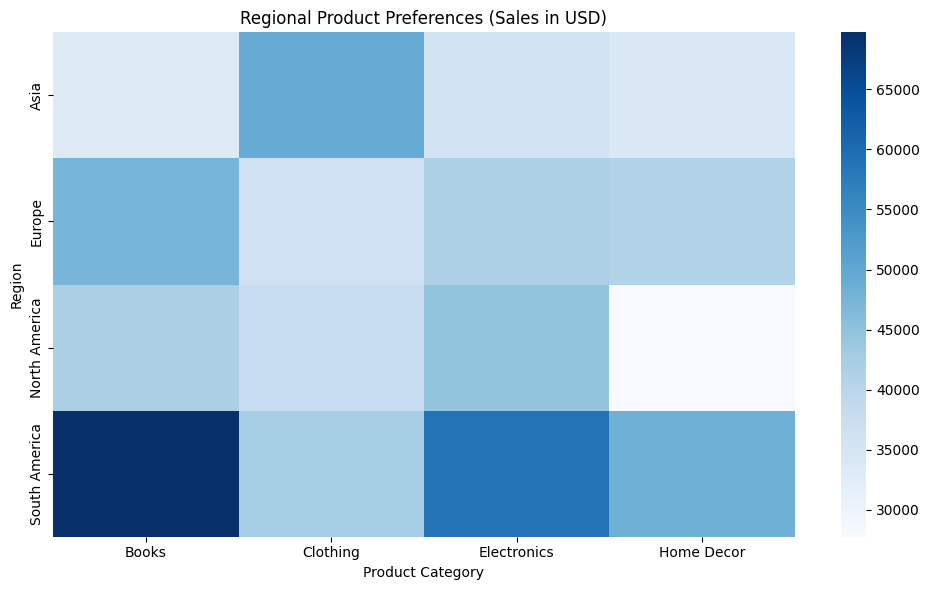

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Convert dates to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], errors='coerce')
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')

# EDA: Summary statistics
print("Customers Summary:")
print(customers_df.describe(include='all'))

print("\nProducts Summary:")
print(products_df.describe(include='all'))

print("\nTransactions Summary:")
print(transactions_df.describe(include='all'))

# Merge datasets for deeper insights
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

# Insight 1: Total sales by region
region_sales = merged_df.groupby('Region')['TotalValue'].sum().reset_index()
print("\nTotal Sales by Region:")
print(region_sales)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(data=region_sales, x='Region', y='TotalValue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insight 2: Top 5 product categories by sales
top_categories = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Categories by Total Sales:")
print(top_categories)

# Visualization
top_categories.plot(kind='bar', title='Top 5 Product Categories by Sales', xlabel='Category', ylabel='Total Sales (USD)', figsize=(8, 6))
plt.tight_layout()
plt.show()

# Insight 3: Signup trends over time
customers_df['SignupYearMonth'] = customers_df['SignupDate'].dt.to_period('M')
signup_trends = customers_df['SignupYearMonth'].value_counts().sort_index()
print("\nSignup Trends Over Time:")
print(signup_trends)

# Visualization
signup_trends.plot(kind='line', title='Customer Signup Trends Over Time', xlabel='Time (Year-Month)', ylabel='Number of Signups', figsize=(10, 6))
plt.tight_layout()
plt.show()

# Insight 4: Customer transaction frequency
transaction_freq = merged_df.groupby('CustomerID')['TransactionID'].count().describe()
print("\nCustomer Transaction Frequency Summary:")
print(transaction_freq)

# Insight 5: Regional product preferences
region_category = merged_df.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()
print("\nRegional Product Preferences:")
print(region_category)

# Heatmap Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(region_category, annot=False, cmap='Blues', cbar=True)
plt.title('Regional Product Preferences (Sales in USD)')
plt.xlabel('Product Category')
plt.ylabel('Region')
plt.tight_layout()
plt.show()
